In [1]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

numpy version	: 1.17.2
pandas version	: 0.25.2
seaborn version	: 0.9.0


# 1. Data Cleaning

In [2]:
# Loading the data
filepath = 'loan.csv'
#number_of_rows = 10000

loan = pd.read_csv(filepath)

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,nan,nan,2500,2500,2500.0000,36 months,13.5600,84.9200,C,C1,Chef,10+ years,RENT,55000.0000,Not Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.2400,0.0000,Apr-2001,1.0000,nan,45.0000,9.0000,1.0000,4341,10.3000,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0400,0.0000,0.0000,0.0000,Feb-2019,84.9200,Mar-2019,Feb-2019,0.0000,...,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,nan,nan,30000,30000,30000.0000,60 months,18.9400,777.2300,D,D2,Postmaster,10+ years,MORTGAGE,90000.0000,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.5200,0.0000,Jun-1987,0.0000,71.0000,75.0000,13.0000,1.0000,12315,24.2000,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,894.8600,0.0000,0.0000,0.0000,Feb-2019,777.2300,Mar-2019,Feb-2019,0.0000,...,8.0000,14.0000,4.0000,13.0000,0.0000,0.0000,0.0000,6.0000,95.0000,0.0000,1.0000,0.0000,372872.0000,99468.0000,15000.0000,94072.0000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,nan,nan,5000,5000,5000.0000,36 months,17.9700,180.6900,D,D1,Administrative,6 years,MORTGAGE,59280.0000,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.5100,0.0000,Apr-2011,0.0000,nan,nan,8.0000,0.0000,4599,19.1000,13.0000,w,4787.2100,4787.2100,353.8900,353.8900,212.7900,141.1000,0.0000,0.0000,0.0000,Feb-2019,180.6900,Mar-2019,Feb-2019,0.0000,...,6.0000,7.0000,3.0000,8.0000,0.0000,0.0000,0.0000,0.0000,100.0000,0.0000,0.0000,0.0000,136927.0000,11749.0000,13800.0000,10000.0000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,nan,nan,4000,4000,4000.0000,36 months,18.9400,146.5100,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0000,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.7400,0.0000,Feb-2006,0.0000,nan,nan,10.0000,0.0000,5468,78.1000,13.0000,w,3831.9300,3831.9300,286.7100,286.7100,168.0700,118.6400,0.0000,0.0000,0.0000,Feb-2019,146.5100,Mar-2019,Feb-2019,0.0000,...,2.0000,3.0

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [100]:
loan.shape

(2260668, 145)

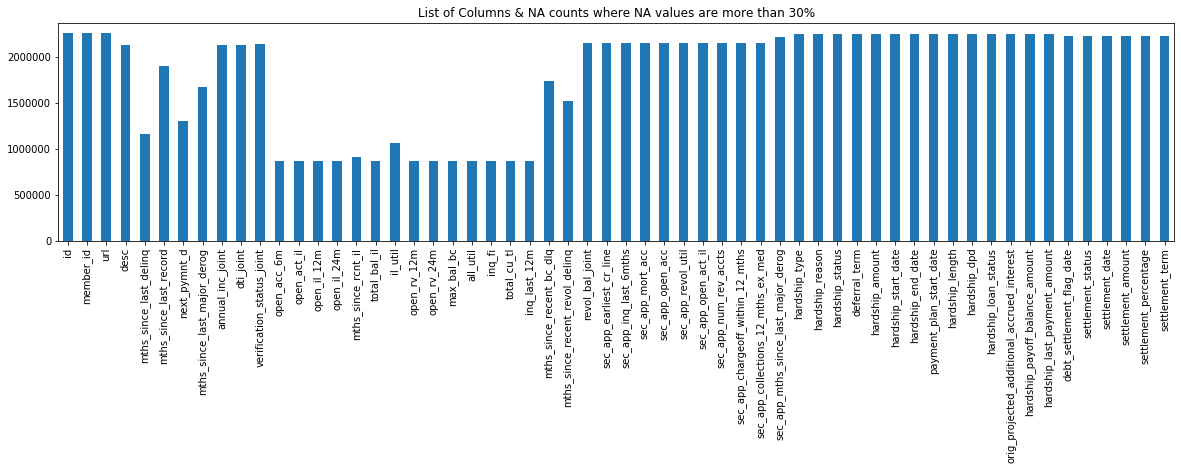

In [7]:
# columns that have over 30% of NaN values
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]

plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [ ]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
                  '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

loan = removeNulls(loan, axis =1,percent = 0.3)
loan = removeNulls(loan, axis =0,percent = 0.3)

In [7]:
loan.shape

(2260668, 87)

In [13]:
string_columns = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag']

In [14]:
loan[string_columns] = loan[string_columns].astype('category')

In [ ]:
print(loan.dtypes)

In [16]:
# drop comuns where the number of unique values equals = 1
# no value for analysis
def eliminate_single_unique_values(dataframe):
    df = dataframe.copy()
    unique = df.nunique()
    unique = unique[unique==1]
    df.drop(labels=list(unique.index), axis=1,inplace=True)
    print('Current dataframe shape is:',df.shape)
    return df
loan = eliminate_single_unique_values(loan)    

Current dataframe shape is: (2260668, 86)


In [ ]:
# dataset-related
loan.emp_length.fillna('0',inplace=True)

In [18]:
# dataset-related
not_required_columns = ["zip_code"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)

In [19]:
# dealiing with non-numeric values that are actually numeric
# .info attribute is used to access the type of data in every column
loan.info

numeric_columns = ['loan_amnt','funded_amnt',
                   'funded_amnt_inv','installment',
                   'int_rate','annual_inc','dti']

def convert_to_numeric(dataframe,columns_to_convert):
    dataframe[columns_to_convert] = dataframe[columns_to_convert].apply(pd.to_numeric)
    return dataframe

loan = convert_to_numeric(loan,numeric_columns)

In [20]:
# "other"_classifier
def other_classifier(dataframe,column,pct):
    """ This function changes values of a chosen categorical 
    column to 'other' if the count of such values is below a defined percentage (pct).
    dataframe - 
    column - column containing categorical values
    pct - threshold below which categorical values get reassigned to 'other', expressed in int.
    """
    
    df = dataframe.copy()
    category_break_down = (df[column].value_counts()*100)/len(df)
    categories_to_reassign = list(category_break_down[category_break_down < pct].index)
    df[column].replace(categories_to_reassign,'other', inplace=True)
    
    return df

In [21]:
loan = other_classifier(loan,'purpose',pct=1)

In [23]:
loan.to_csv('2nd_clean.csv')

# Reducing the size of the dataframe
* at the moment the df takes up 1.4GB (down 42% compared to the initial 2.4GB)
* first step is to deal with the string objects by changing their type to categorical

In [111]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0000,36 months,13.5600,84.9200,C,C1,Chef,10+ years,RENT,55000.0000,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,NY,18.2400,0.0000,Apr-2001,1.0000,9.0000,1.0000,4341,10.3000,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0400,0.0000,0.0000,0.0000,Feb-2019,84.9200,Feb-2019,0.0000,Individual,0.0000,0.0000,16901.0000,42000.0000,9.0000,1878.0000,34360.0000,5.9000,0.0000,0.0000,140.0000,212.0000,1.0000,1.0000,0.0000,1.0000,2.0000,0.0000,2.0000,5.0000,3.0000,3.0000,16.0000,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,N,Cash,N
1,30000,30000,30000.0000,60 months,18.9400,777.2300,D,D2,Postmaster,10+ years,MORTGAGE,90000.0000,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,LA,26.5200,0.0000,Jun-1987,0.0000,13.0000,1.0000,12315,24.2000,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,894.8600,0.0000,0.0000,0.0000,Feb-2019,777.2300,Feb-2019,0.0000,Individual,0.0000,1208.0000,321915.0000,50800.0000,10.0000,24763.0000,13761.0000,8.3000,0.0000,0.0000,163.0000,378.0000,4.0000,3.0000,3.0000,4.0000,4.0000,0.0000,2.0000,4.0000,4.0000,9.0000,27.0000,8.0000,14.0000,4.0000,13.0000,0.0000,0.0000,0.0000,6.0000,95.0000,0.0000,1.0000,0.0000,372872.0000,99468.0000,15000.0000,94072.0000,N,Cash,N
2,5000,5000,5000.0000,36 months,17.9700,180.6900,D,D1,Administrative,6 years,MORTGAGE,59280.0000,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,MI,10.5100,0.0000,Apr-2011,0.0000,8.0000,0.0000,4599,19.1000,13.0000,w,4787.2100,4787.2100,353.8900,353.8900,212.7900,141.1000,0.0000,0.0000,0.0000,Feb-2019,180.6900,Feb-2019,0.0000,Individual,0.0000,0.0000,110299.0000,24100.0000,4.0000,18383.0000,13800.0000,0.0000,0.0000,0.0000,87.0000,92.0000,15.0000,14.0000,2.0000,77.0000,14.0000,0.0000,0.0000,3.0000,3.0000,3.0000,4.0000,6.0000,7.0000,3.0000,8.0000,0.0000,0.0000,0.0000,0.0000,100.0000,0.0000,0.0000,0.0000,136927.0000,11749.0000,13800.0000,10000.0000,N,Cash,N
3,4000,4000,4000.0000,36 months,18.9400,146.5100,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0000,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,WA,16.7400,0.0000,Feb-2006,0.0000,10.0000,0.0000,5468,78.1000,13.0000,w,3831.9300,3831.9300,286.7100,286.7100,168.0700,118.6400,0.0000,0.0000,0.0000,Feb-2019,146.5100,Feb-2019,0.0000,Individual,0.0000,686.0000,305049.0000,7000.0000,5.0000,30505.0000,1239.0000,75.2000,0.0000,0.0000,62.0000,154.0000,64.0000,5.0000,3.0000,64.0000,5.0000,0.0000,1.0000,2.0000,1.0000,2.0000,7.0000,2.0000,3.0000,2.0000,10.0000,0.0000,0.0000,0.0000,3.0000,100.0000,100.0000,0.0000,0.0000,385183.0000,36151.0000,5000.0000,44984.0000,N,Cash,N
4,30000,30000,30000.0000,60

# Dealing with floats and integers dtypes

In [112]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_columns = loan.select_dtypes(include=numerics)

In [116]:
floats = numeric_columns.dtypes=='float64'
floats_columns = floats[floats==True].index



"""
All of the float numbers are float64 type, this type can contain values between 
-9223372036854775808 and 9223372036854775807. So I am reducing the memory usage by
changing the datatype to a less-byte-consuming one (float16). 
Integer (-32768 to 32767)

"""


suitable_floats = loan[floats_columns].max()<32767
suitable_floats = suitable_floats[suitable_floats==True].index
loan[suitable_floats] = loan[suitable_floats].astype('float16')

In [127]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 85 columns):
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               float64
term                          object
int_rate                      float16
installment                   float16
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    float64
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
addr_state                    object
dti                           float16
delinq_2yrs                   float16
earliest_cr_line              object
inq_last_6mths                float16
open_acc                      f

In [128]:
object_vars = loan.dtypes=='object'
object_vars = object_vars[object_vars==True].index
loan[object_vars] = loan[object_vars].astype('category')


In [129]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 85 columns):
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               float64
term                          category
int_rate                      float16
installment                   float16
grade                         category
sub_grade                     category
emp_title                     category
emp_length                    category
home_ownership                category
annual_inc                    float64
verification_status           category
issue_d                       category
loan_status                   category
pymnt_plan                    category
purpose                       category
title                         category
addr_state                    category
dti                           float16
delinq_2yrs                   float16
earliest_cr_line              category
inq_last_6mths                float16
ope

* Finally we arrive at 654.3 MB, 73.84% reduction in file size.

In [137]:
integers = numeric_columns.dtypes=='int64'
integers_columns = integers[integers==True].index

* Term
* contains string with numbers

In [177]:
loan['term'][:4]

0     36 months
1     60 months
2     36 months
3     36 months
Name: term, dtype: category
Categories (2, object): [36 months, 60 months]

In [206]:
# term = loanastypeerm'].str.split(' ',expand=True)
loan['term'] = term[1]
loan['term'] = pd.to_numeric(loan['term'])
loan['term'] = loan['term'].astype('int16')
#loan['term'].dtypes

* emp_length
* number of years employed, 10 means >=10 (set to int8)

In [215]:
emp_length = loan['emp_length'].str.split(' ', expand=True)
emp_length[0].replace(to_replace='<', value=0, inplace=True)
emp_length[0].replace(to_replace='10+', value=10, inplace=True)
loan['emp_length'] = pd.to_numeric(emp_length[0])
loan['emp_length'] = loan['emp_length'].astype('int8')

* issue_d has to be converted to datetime
* same as earliest_cr_line

In [244]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'])
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'])


In [260]:
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'])
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'])

In [266]:
#loan.select_dtypes(include=['category'])

In [267]:
loan.to_csv('prepared_for_eda.csv') 

In [268]:
loan.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0000,36,13.5625,84.9375,C,C1,Chef,10,RENT,55000.0000,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,NY,18.2344,0.0000,2001-04-01,1.0000,9.0000,1.0000,4341,10.2969,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0312,0.0000,0.0000,0.0000,2019-02-01,84.9200,2019-02-01,0.0000,Individual,0.0000,0.0000,16901.0000,42000.0000,9.0000,1878.0000,34360.0000,5.8984,0.0000,0.0000,140.0000,212.0000,1.0000,1.0000,0.0000,1.0000,2.0000,0.0000,2.0000,5.0000,3.0000,3.0000,16.0000,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,N,Cash,N
1,30000,30000,30000.0000,60,18.9375,777.0000,D,D2,Postmaster,10,MORTGAGE,90000.0000,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,LA,26.5156,0.0000,1987-06-01,0.0000,13.0000,1.0000,12315,24.2031,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,895.0000,0.0000,0.0000,0.0000,2019-02-01,777.2300,2019-02-01,0.0000,Individual,0.0000,1208.0000,321915.0000,50800.0000,10.0000,24763.0000,13761.0000,8.2969,0.0000,0.0000,163.0000,378.0000,4.0000,3.0000,3.0000,4.0000,4.0000,0.0000,2.0000,4.0000,4.0000,9.0000,27.0000,8.0000,14.0000,4.0000,13.0000,0.0000,0.0000,0.0000,6.0000,95.0000,0.0000,1.0000,0.0000,372872.0000,99468.0000,15000.0000,94072.0000,N,Cash,N
2,5000,5000,5000.0000,36,17.9688,180.7500,D,D1,Administrative,6,MORTGAGE,59280.0000,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,MI,10.5078,0.0000,2011-04-01,0.0000,8.0000,0.0000,4599,19.0938,13.0000,w,4787.2100,4787.2100,353.8900,353.8900,212.7900,141.1250,0.0000,0.0000,0.0000,2019-02-01,180.6900,2019-02-01,0.0000,Individual,0.0000,0.0000,110299.0000,24100.0000,4.0000,18383.0000,13800.0000,0.0000,0.0000,0.0000,87.0000,92.0000,15.0000,14.0000,2.0000,77.0000,14.0000,0.0000,0.0000,3.0000,3.0000,3.0000,4.0000,6.0000,7.0000,3.0000,8.0000,0.0000,0.0000,0.0000,0.0000,100.0000,0.0000,0.0000,0.0000,136927.0000,11749.0000,13800.0000,10000.0000,N,Cash,N
3,4000,4000,4000.0000,36,18.9375,146.5000,D,D2,IT Supervisor,10,MORTGAGE,92000.0000,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,WA,16.7344,0.0000,2006-02-01,0.0000,10.0000,0.0000,5468,78.1250,13.0000,w,3831.9300,3831.9300,286.7100,286.7100,168.0700,118.6250,0.0000,0.0000,0.0000,2019-02-01,146.5100,2019-02-01,0.0000,Individual,0.0000,686.0000,305049.0000,7000.0000,5.0000,30505.0000,1239.0000,75.1875,0.0000,0.0000,62.0000,154.0000,64.0000,5.0000,3.0000,64.0000,5.0000,0.0000,1.0000,2.0000,1.0000,2.0000,7.0000,2.0000,3.0000,2.0000,10.0000,0.0000,0.0000,0.0000,3.0000,100.0000,100.0000,0.0000,0.0000,385183.0000,36151.0000,5000.0000,44984.0000,N,Cash,N
4,30000,30000,30000.0000,60,16.1406,732.0000,C,C4,